In [ ]:

## RL-обучение в игре "Камень-ножницы-бумага" (Self-Play Q-Learning)

In [ ]:
## 1. Аннотация

# В данной работе исследуется обучение с подкреплением на примере игры "Камень-ножницы-бумага" с помощью self-play двух Q-Learning агентов. Проведён анализ динамики обучения, частоты выбора действий и поведения агентов при увеличении числа эпизодов. Реализована визуализация процесса и возможность интерактивной игры пользователя против агента.


In [ ]:
## 3. Постановка задачи

# **Цель:**
# Показать, как RL-агенты могут научиться оптимальной стратегии игры “камень-ножницы-бумага” в процессе self-play.
#
# **Задачи:**
# - Реализовать Q-Learning агентов
# - Провести обучение агентов друг против друга
# - Визуализировать ход обучения и стратегии
# - Реализовать интерактивную игру пользователя против агента


In [ ]:
## 4. Описание алгоритма и среды

# - Используется Q-Learning (табличный)
# - Действия: 0 — Камень, 1 — Бумага, 2 — Ножницы
# - Состояний нет (или состояние всегда одинаково)
# - Награда: +1 за победу, 0 за ничью, -1 за поражение
# - Эпсилон-гриди стратегия для исследования среды


In [ ]:
## 5. Импорт библиотек и определение классов
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import clear_output


In [ ]:
class QAgent:
    def __init__(self, action_size, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.999):
        self.q_table = np.zeros(action_size)
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.action_size = action_size

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            return np.argmax(self.q_table)

    def update(self, action, reward):
        self.q_table[action] += self.alpha * (reward - self.q_table[action])
        self.epsilon *= self.epsilon_decay

def get_reward(a1, a2):
    if a1 == a2:
        return 0
    elif (a1 == 0 and a2 == 2) or (a1 == 1 and a2 == 0) or (a1 == 2 and a2 == 1):
        return 1
    else:
        return -1

moves = {0: "✊", 1: "✋", 2: "✌️"}


In [ ]:

def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [ ]:
## 6. Обучение агентов: малое количество эпизодов

# В этой секции агенты обучаются друг против друга на короткой сессии).
# Это позволяет пронаблюдать, как они быстро адаптируются и как появляются перекосы в стратегиях.
# Они сейчас не переобучатся

In [ ]:
agent1 = QAgent(action_size=3)
agent2 = QAgent(action_size=3)

n_episodes = 500
history1, history2 = [], []
actions1, actions2 = [], []

for ep in range(n_episodes):
    action1 = agent1.choose_action()
    action2 = agent2.choose_action()
    reward1 = get_reward(action1, action2)
    reward2 = -reward1
    agent1.update(action1, reward1)
    agent2.update(action2, reward2)
    history1.append(reward1)
    history2.append(reward2)
    actions1.append(action1)
    actions2.append(action2)


In [ ]:
## 7. Визуализация: динамика обучения (learning curve)

# Построим график скользящего среднего выигрыша для обоих агентов, чтобы отследить процесс обучения.

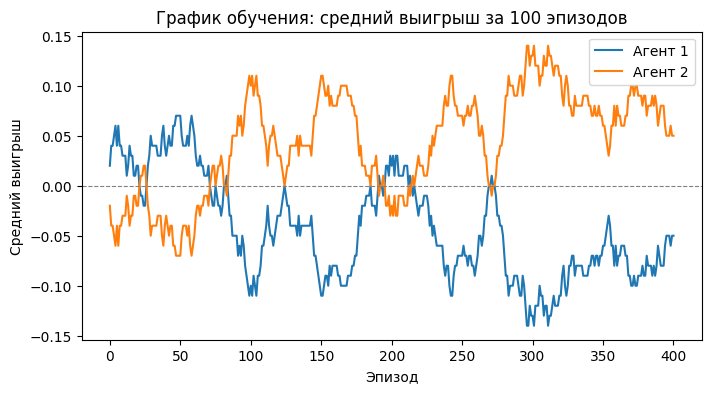

In [ ]:
window = 100  # окно сглаживания
avg1 = moving_average(history1, window)
avg2 = moving_average(history2, window)

plt.figure(figsize=(8,4))
plt.plot(avg1, label="Агент 1")
plt.plot(avg2, label="Агент 2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("График обучения: средний выигрыш за 100 эпизодов")
plt.xlabel("Эпизод")
plt.ylabel("Средний выигрыш")
plt.legend()
plt.show()


In [ ]:
## 8. Анимация и анализ последних игр

# В этом разделе отображается анимация и таблица последних 10/20 игр агента против соперника.
# Можно увидеть, какие ходы делают агенты на финише обучения.

In [ ]:
animate_games(actions1, actions2, history1, "Агент 1")
games_table(actions1, actions2, history1, "Агент 1")



Анимация последних 10 игр Агент 1:
 491: Агент ✊  |  Соперник ✋  |  Поражение 🔴
 492: Агент ✊  |  Соперник ✋  |  Поражение 🔴
 493: Агент ✋  |  Соперник ✊  |  Победа 🟢
 494: Агент ✋  |  Соперник ✊  |  Победа 🟢
 495: Агент ✌️  |  Соперник ✌️  |  Ничья ⚪️
 496: Агент ✋  |  Соперник ✌️  |  Поражение 🔴
 497: Агент ✋  |  Соперник ✋  |  Ничья ⚪️
 498: Агент ✋  |  Соперник ✋  |  Ничья ⚪️
 499: Агент ✋  |  Соперник ✊  |  Победа 🟢
 500: Агент ✋  |  Соперник ✋  |  Ничья ⚪️


<ipython-input-3-73d8098280d5>:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(lambda x: 'background-color: #c8e6c9' if x=='Победа' else


,Раунд,Ход агента,Ход соперника,Результат
0,481,✊,✌️,Победа
1,482,✊,✊,Ничья
2,483,✌️,✊,Поражение
3,484,✊,✊,Ничья
4,485,✌️,✊,Поражение
5,486,✌️,✌️,Ничья
6,487,✌️,✊,Поражение
7,488,✋,✊,Победа
8,489,✊,✌️,Победа
9,490,✌️,✊,Поражение


In [ ]:
animate_games(actions2, actions1, history2, "Агент 2")
games_table(actions2, actions1, history2, "Агент 2")



Анимация последних 10 игр Агент 2:
 491: Агент ✋  |  Соперник ✊  |  Победа 🟢
 492: Агент ✋  |  Соперник ✊  |  Победа 🟢
 493: Агент ✊  |  Соперник ✋  |  Поражение 🔴
 494: Агент ✊  |  Соперник ✋  |  Поражение 🔴
 495: Агент ✌️  |  Соперник ✌️  |  Ничья ⚪️
 496: Агент ✌️  |  Соперник ✋  |  Победа 🟢
 497: Агент ✋  |  Соперник ✋  |  Ничья ⚪️
 498: Агент ✋  |  Соперник ✋  |  Ничья ⚪️
 499: Агент ✊  |  Соперник ✋  |  Поражение 🔴
 500: Агент ✋  |  Соперник ✋  |  Ничья ⚪️


<ipython-input-3-73d8098280d5>:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(lambda x: 'background-color: #c8e6c9' if x=='Победа' else


,Раунд,Ход агента,Ход соперника,Результат
0,481,✌️,✊,Поражение
1,482,✊,✊,Ничья
2,483,✊,✌️,Победа
3,484,✊,✊,Ничья
4,485,✊,✌️,Победа
5,486,✌️,✌️,Ничья
6,487,✊,✌️,Победа
7,488,✊,✋,Поражение
8,489,✌️,✊,Поражение
9,490,✊,✌️,Победа


In [ ]:
## 9. Графики частоты выбора ходов

# Строятся гистограммы распределения "камень-бумага-ножницы" для каждого агента — наглядно видно,
# есть ли перекос в стратегии.


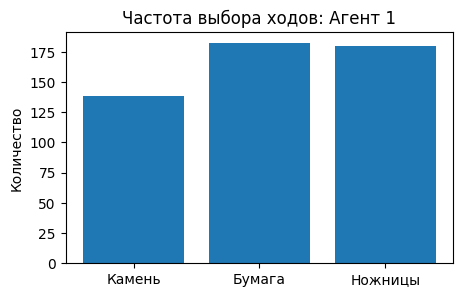

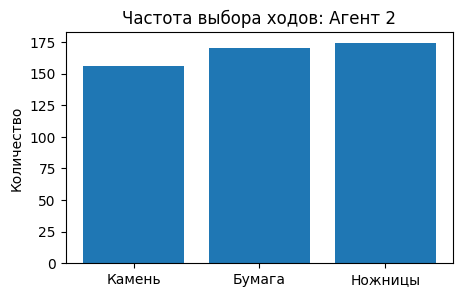

In [ ]:
## 9. Графики частоты выбора ходов

# Строятся гистограммы распределения "камень-бумага-ножницы" для каждого агента — наглядно видно, есть ли перекос в стратегии.

def plot_action_freq(actions, agent_name):
    action_names = ['Камень', 'Бумага', 'Ножницы']
    action_counts = [actions.count(i) for i in range(3)]
    plt.figure(figsize=(5,3))
    plt.bar(action_names, action_counts)
    plt.title(f"Частота выбора ходов: {agent_name}")
    plt.ylabel("Количество")
    plt.show()

plot_action_freq(actions1, "Агент 1")
plot_action_freq(actions2, "Агент 2")


In [ ]:
## 10. Интерактивная игра: человек против обученного агента

# Пользователь может сыграть партию против любого из агентов, чтобы на практике оценить их стратегию.

In [ ]:

agent_choice = None
while agent_choice not in ["1", "2"]:
    agent_choice = input("Против какого агента играть? Введите 1 или 2: ")
agent_choice = int(agent_choice)

if agent_choice == 1:
    play_agent = agent1
elif agent_choice == 2:
    play_agent = agent2

print(f"\nИграете против агента {agent_choice}. Вводите 0 — Камень, 1 — Бумага, 2 — Ножницы.")

for i in range(10):
    user_input = input("Ваш ход (0/1/2): ")
    try:
        user_action = int(user_input)
        if user_action not in [0,1,2]:
            print("Только 0, 1 или 2!")
            continue
    except:
        print("Только 0, 1 или 2!")
        continue
    agent_action = play_agent.choose_action()
    print(f"Ваш ход: {moves[user_action]}  |  Агент: {moves[agent_action]}")
    reward = get_reward(user_action, agent_action)
    if reward == 1:
        print("Вы победили! 🟢")
    elif reward == -1:
        print("Вы проиграли! 🔴")
    else:
        print("Ничья! ⚪️")
    play_agent.update(agent_action, -reward)  # Агент учится на ваших ходах
    print("---")


Против какого агента играть? Введите 1 или 2: 1

Играете против агента 1. Вводите 0 — Камень, 1 — Бумага, 2 — Ножницы.
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✌️
Вы проиграли! 🔴
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✊
Вы победили! 🟢
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✊
Вы победили! 🟢
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✊
Вы победили! 🟢
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✋
Ничья! ⚪️
---


In [ ]:
## 11. Обучение агентов: большое количество эпизодов (self-play)

# В этой секции обучение проводится на большом количестве эпизодов,
# чтобы показать “сходимость” стратегий агентов.

In [ ]:
agent1 = QAgent(action_size=3)
agent2 = QAgent(action_size=3)

n_episodes = 3000
history1, history2 = [], []
actions1, actions2 = [], []

for ep in range(n_episodes):
    action1 = agent1.choose_action()
    action2 = agent2.choose_action()
    reward1 = get_reward(action1, action2)
    reward2 = -reward1
    agent1.update(action1, reward1)
    agent2.update(action2, reward2)
    history1.append(reward1)
    history2.append(reward2)
    actions1.append(action1)
    actions2.append(action2)


In [ ]:
## 12. Визуализация результатов обучения

# Повторно строятся графики и таблицы, чтобы сравнить, как изменяются
# стратегии и динамика игры на длинной дистанции.


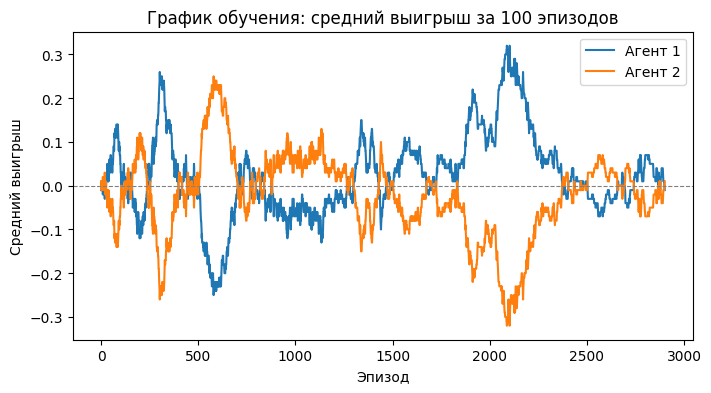

In [ ]:
window = 100  # окно сглаживания
avg1 = moving_average(history1, window)
avg2 = moving_average(history2, window)

plt.figure(figsize=(8,4))
plt.plot(avg1, label="Агент 1")
plt.plot(avg2, label="Агент 2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("График обучения: средний выигрыш за 100 эпизодов")
plt.xlabel("Эпизод")
plt.ylabel("Средний выигрыш")
plt.legend()
plt.show()


In [ ]:
def animate_games(actions_agent, actions_opponent, history, agent_name, n_show=10):
    print(f"\nАнимация последних {n_show} игр {agent_name}:")
    for i in range(-n_show, 0):
        action = actions_agent[i]
        opponent_action = actions_opponent[i]
        reward = history[i]
        if reward == 1:
            result = "Победа 🟢"
        elif reward == -1:
            result = "Поражение 🔴"
        else:
            result = "Ничья ⚪️"
        print(f"{i+len(history)+1:4}: Агент {moves[action]}  |  Соперник {moves[opponent_action]}  |  {result}")
        time.sleep(0.5)

def games_table(actions_agent, actions_opponent, history, agent_name, n_show=20):
    df = pd.DataFrame({
        'Раунд': list(range(len(history)-n_show+1, len(history)+1)),
        'Ход агента': [moves[a] for a in actions_agent[-n_show:]],
        'Ход соперника': [moves[a] for a in actions_opponent[-n_show:]],
        'Результат': ["Победа" if r==1 else "Поражение" if r==-1 else "Ничья" for r in history[-n_show:]]
    })
    return df.style.applymap(lambda x: 'background-color: #c8e6c9' if x=='Победа' else
                                        'background-color: #ffcdd2' if x=='Поражение' else
                                        'background-color: #fff9c4' if x=='Ничья' else '')


In [ ]:
animate_games(actions1, actions2, history1, "Агент 1")
games_table(actions1, actions2, history1, "Агент 1")



Анимация последних 10 игр Агент 1:
2991: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2992: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2993: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2994: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2995: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2996: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2997: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2998: Агент ✋  |  Соперник ✌️  |  Поражение 🔴
2999: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
3000: Агент ✊  |  Соперник ✊  |  Ничья ⚪️


<ipython-input-32-73d8098280d5>:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(lambda x: 'background-color: #c8e6c9' if x=='Победа' else


,Раунд,Ход агента,Ход соперника,Результат
0,2981,✊,✊,Ничья
1,2982,✊,✊,Ничья
2,2983,✊,✊,Ничья
3,2984,✊,✊,Ничья
4,2985,✊,✊,Ничья
5,2986,✊,✊,Ничья
6,2987,✊,✊,Ничья
7,2988,✊,✊,Ничья
8,2989,✊,✊,Ничья
9,2990,✊,✊,Ничья


In [ ]:
animate_games(actions2, actions1, history2, "Агент 2")
games_table(actions2, actions1, history2, "Агент 2")



Анимация последних 10 игр Агент 2:
2991: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2992: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2993: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2994: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2995: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2996: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2997: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
2998: Агент ✌️  |  Соперник ✋  |  Победа 🟢
2999: Агент ✊  |  Соперник ✊  |  Ничья ⚪️
3000: Агент ✊  |  Соперник ✊  |  Ничья ⚪️


<ipython-input-32-73d8098280d5>:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(lambda x: 'background-color: #c8e6c9' if x=='Победа' else


,Раунд,Ход агента,Ход соперника,Результат
0,2981,✊,✊,Ничья
1,2982,✊,✊,Ничья
2,2983,✊,✊,Ничья
3,2984,✊,✊,Ничья
4,2985,✊,✊,Ничья
5,2986,✊,✊,Ничья
6,2987,✊,✊,Ничья
7,2988,✊,✊,Ничья
8,2989,✊,✊,Ничья
9,2990,✊,✊,Ничья


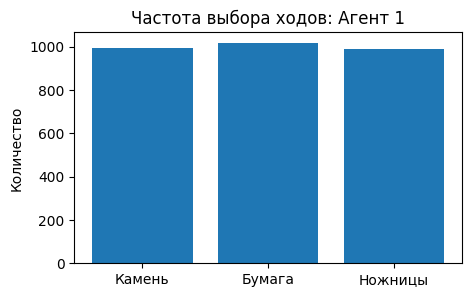

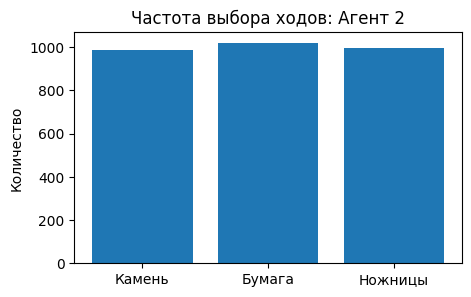

In [ ]:
def plot_action_freq(actions, agent_name):
    action_names = ['Камень', 'Бумага', 'Ножницы']
    action_counts = [actions.count(i) for i in range(3)]
    plt.figure(figsize=(5,3))
    plt.bar(action_names, action_counts)
    plt.title(f"Частота выбора ходов: {agent_name}")
    plt.ylabel("Количество")
    plt.show()

plot_action_freq(actions1, "Агент 1")
plot_action_freq(actions2, "Агент 2")


In [ ]:
# Выбор агента для игры
agent_choice = None
while agent_choice not in ["1", "2"]:
    agent_choice = input("Против какого агента играть? Введите 1 или 2: ")
agent_choice = int(agent_choice)

if agent_choice == 1:
    play_agent = agent1
elif agent_choice == 2:
    play_agent = agent2

print(f"\nИграете против агента {agent_choice}. Вводите 0 — Камень, 1 — Бумага, 2 — Ножницы.")

for i in range(10):
    user_input = input("Ваш ход (0/1/2): ")
    try:
        user_action = int(user_input)
        if user_action not in [0,1,2]:
            print("Только 0, 1 или 2!")
            continue
    except:
        print("Только 0, 1 или 2!")
        continue
    agent_action = play_agent.choose_action()
    print(f"Ваш ход: {moves[user_action]}  |  Агент: {moves[agent_action]}")
    reward = get_reward(user_action, agent_action)
    if reward == 1:
        print("Вы победили! 🟢")
    elif reward == -1:
        print("Вы проиграли! 🔴")
    else:
        print("Ничья! ⚪️")
    play_agent.update(agent_action, -reward)  # Агент учится на ваших ходах
    print("---")


Против какого агента играть? Введите 1 или 2: 2

Играете против агента 2. Вводите 0 — Камень, 1 — Бумага, 2 — Ножницы.
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✊
Вы победили! 🟢
---
Ваш ход (0/1/2): 3
Только 0, 1 или 2!
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✌️
Вы проиграли! 🔴
---
Ваш ход (0/1/2): 2
Ваш ход: ✌️  |  Агент: ✌️
Ничья! ⚪️
---
Ваш ход (0/1/2): 3
Только 0, 1 или 2!
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✌️
Вы проиграли! 🔴
---
Ваш ход (0/1/2): 0
Ваш ход: ✊  |  Агент: ✌️
Вы победили! 🟢
---
Ваш ход (0/1/2): 0
Ваш ход: ✊  |  Агент: ✌️
Вы победили! 🟢
---
Ваш ход (0/1/2): 1
Ваш ход: ✋  |  Агент: ✌️
Вы проиграли! 🔴
---
Ваш ход (0/1/2): 2
Ваш ход: ✌️  |  Агент: ✌️
Ничья! ⚪️
---


In [ ]:
## 13. Выводы

#  - Self-play приводит к формированию равновероятных стратегий, что совпадает с теоретически оптимальным решением для “камень-ножницы-бумага”.
#  - Агенты учатся друг у друга, при этом средний выигрыш стремится к нулю.
#  - Визуализация и интерактив позволяют наглядно оценить процесс обучения.
#  - На большом количестве эпизодов агенты переобучаются.

